In [1]:
import db
import ROOT
import numpy as np
from matplotlib import pyplot as plt
import os
print(os.getcwd())

Welcome to JupyROOT 6.14/04
/workdir/jupyter


In [2]:

header = 0x52000
data =  0x300 + (0xFF & 15)
print(hex((header+data)))
#print("active boards")
#db.active_board_list()

0x5230f


In [3]:
db.dump_db_to_root("/workdir/dump.root")


scanning keys of board: 0014
scanning keys of board: 0021
scanning keys of board: 0005
scanning keys of board: 0022
scanning keys of board: 0025
scanning keys of board: 0003
scanning keys of board: 0026
scanning keys of board: 0027
scanning keys of board: 0008
scanning keys of board: 0007
scanning keys of board: 0004
scanning keys of board: 0002
scanning keys of board: 0028
scanning keys of board: 0029
scanning keys of board: 0030
scanning keys of board: 0023
scanning keys of board: 0020
scanning keys of board: 0017
scanning keys of board: 0016
scanning keys of board: 0015
scanning keys of board: 0006
scanning keys of board: 0010
scanning keys of board: 0011
scanning keys of board: 0009
scanning keys of board: 0013
scanning keys of board: 0018
dumping data of board: 0014
dumping data of board: 0021
dumping data of board: 0005
dumping data of board: 0022
dumping data of board: 0025
dumping data of board: 0003
dumping data of board: 0026
dumping data of board: 0027
dumping data of board:

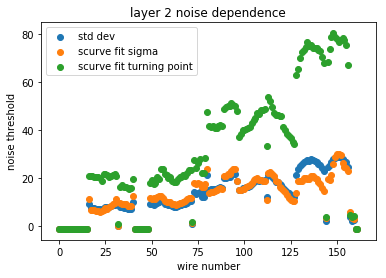

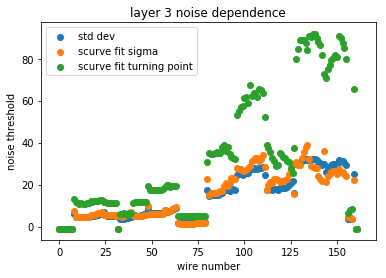

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Info in <TCanvas::Print>: png file noiseFit_lay2_wire16.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire17.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire18.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire19.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire20.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire21.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire22.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire23.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire24.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire25.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire26.png has been created
Info in <TCanvas::Print>: png file noiseFit_lay2_wire27.png has been crea

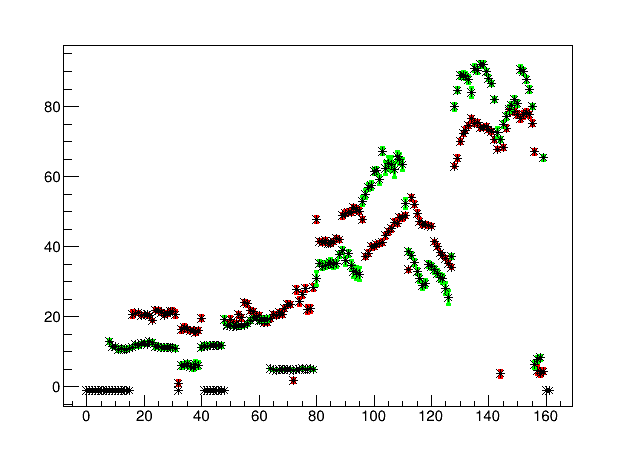

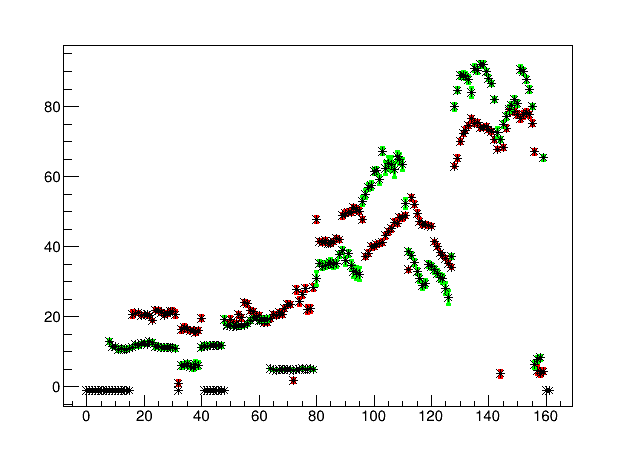

In [5]:

f = ROOT.TFile("/workdir/dump.root")
#f = ROOT.TFile("/workdir/dump_noisescann_all_boards_on.root")
# f = ROOT.TFile("/workdir/dump_noisescann_all_other_boards_off.root")
# f = ROOT.TFile("/workdir/dump_noisescann_all_other_boards_off_baseline.root")
# f = ROOT.TFile("/workdir/dump_noisescann_half_boards_on_gain2.root")
#f = ROOT.TFile("/workdir/dump_noisescann_half_boards_on_gain1.root")
    
#tree = f.Get("scope_data_tree")
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)
c.Divide(16,10)
#tree.Draw("tot_a:t1_a >> potato(500,0,500e-9,500,0,500e-9)","","colz")
#potato = f.Get("potato")
#potato.SetTitle("potato")
#potato.GetXaxis().SetTitle("t1 (s)")
#potato.GetYaxis().SetTitle("tot (s)")
#potato.Draw("colz")
ROOT.gStyle.SetOptFit(1)
n_wires = 162
mg = ROOT.TMultiGraph()
mg2 = ROOT.TMultiGraph()
gr = [1, 2]
gr2 = [1, 2]

dummy_tsbl_tree = f.Get("dummy_tsbl_tree")
index_l = -1
for l in range(2,4):
    index_l += 1
    stdev_list = []
    sigma_list = []
    mean_list = []    
    sigma_list_err = []
    mean_list_err = []  
        
    gr[index_l] = ROOT.TGraphErrors(); gr[index_l].SetLineColor(l);
    gr2[index_l] = ROOT.TGraphErrors(); gr2[index_l].SetLineColor(l);
    scurve = ROOT.TF1("scurve","[0]*(1+erf((-1*x+[2])/(sqrt(2)*[1])))",0,80)
#dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw:wires>>noise_scan(140,0,140,32,0,32)","chamber == 0 && layer == 3 && name == 0017","colz")
    for i in range(0,n_wires):
       #dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw >> raw_scan(120,-20,100)","chamber == 0 && layer == 3 && name == 0015 && board_chan == " + str(i) ,"colz")
       dummy_tsbl_tree.Draw("dummy_calib_tsbl_scan_raw >> raw_scan(150,-10,140)","chamber == 0 && layer == " + str(l) + " && wires == " + str(i) )  
       raw_scan = f.Get("raw_scan")
       if ( raw_scan.GetEntries() > 100 ):
           #raw_scan.Draw()
           c.cd(i+1)
           #raw_scan.Fit("gaus","Q")
           stdev = raw_scan.GetStdDev(1)
           maxX = raw_scan.GetBinCenter(raw_scan.GetMaximumBin()) 
           maxX += 1.0       
           scurve.SetParameters(raw_scan.GetMaximum(),stdev,maxX+stdev)
           raw_scan.Fit("scurve","Q","",maxX, 100)
#            scurve.Draw()
           c.Draw()
           c.SaveAs("noiseFit_lay" + str(l) +"_wire" + str(i) +".png")
          # function = raw_scan.GetFunction("gaus")
           function = raw_scan.GetFunction("scurve")
               #print(i,raw_scan.GetStdDev(1),function.GetParameter(2))
               #print(i,function.GetParameter(1),function.GetParameter(2))
           if ( function.GetParameter(1) < 80 and function.GetParameter(1) > 0):
               sigma_list += [ function.GetParameter(1) ]
               sigma_list_err += [ function.GetParError(1) ]                
           else:
               sigma_list += [ -2 ] 
               sigma_list_err += [ -2 ]                 
           if ( function.GetParameter(2) < 150 and function.GetParameter(2) > 0):    
               mean_list += [ function.GetParameter(2) ]
               mean_list_err += [ function.GetParError(2) ]
           else:     
               mean_list += [ -2 ] 
               mean_list_err += [ -2 ]                 
           stdev_list += [ raw_scan.GetStdDev(1) ]
       else:
           stdev_list += [ -1 ]
           sigma_list += [ -1 ]       
           mean_list += [ -1 ]     
           sigma_list_err += [ -1 ]       
           mean_list_err += [ -1 ]
       gr[index_l].SetPoint(i, i, np.double(sigma_list[i]))
       gr[index_l].SetPointError(i, 0, np.double(sigma_list_err[i]) )
       gr2[index_l].SetPoint(i, i, np.double(mean_list[i]))
       gr2[index_l].SetPointError(i, 0, np.double(mean_list_err[i]) )


    plt.scatter(list(range(0,n_wires)), stdev_list, label="std dev")
    plt.xlabel("wire number")
    plt.ylabel("noise threshold")
    plt.title("layer " + str(l) + " noise dependence")
    plt.scatter(list(range(0,n_wires)), sigma_list, label="scurve fit sigma")
    plt.scatter(list(range(0,n_wires)), mean_list, label="scurve fit turning point")


    plt.legend()
    plt.show()
    mg.Add(gr[index_l]); gr[index_l].SetTitle("layer " + str(l) ); gr[index_l].SetLineWidth(3);
    mg2.Add(gr2[index_l]); gr2[index_l].SetTitle("layer " + str(l) ); gr2[index_l].SetLineWidth(3);   


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


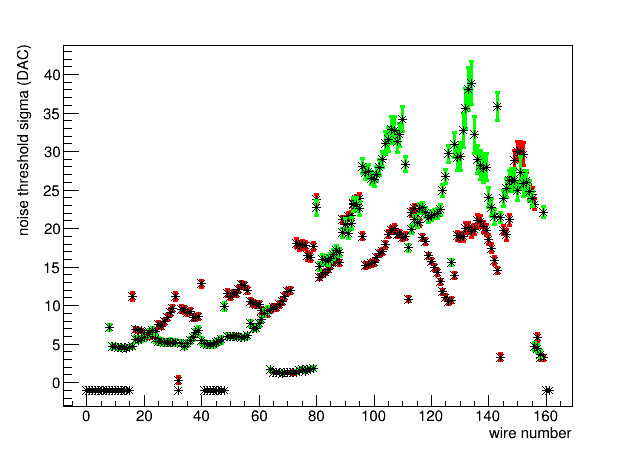

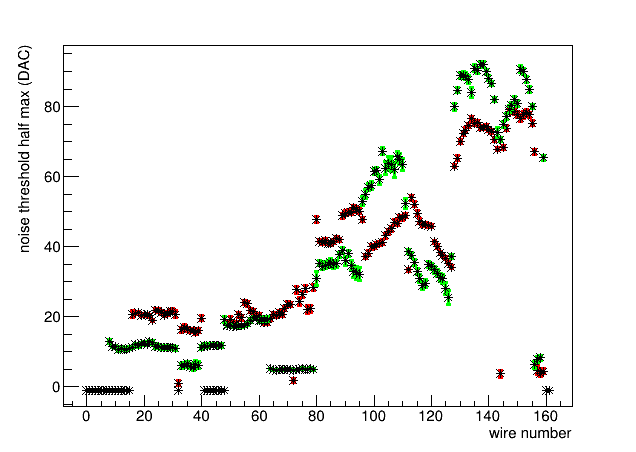

In [14]:
#c1 = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)
c1 = ROOT.TCanvas("c1","The Canvas Title",640,480); c1.cd();
mg2.Draw("a*")
mg2.GetXaxis().SetTitle("wire number");
mg2.GetYaxis().SetTitle("noise threshold half max (DAC)");
c1.Draw()
c.cd();
mg.Draw("a*")
mg.GetXaxis().SetTitle("wire number");
mg.GetYaxis().SetTitle("noise threshold sigma (DAC)");
c.Draw()
#c2 = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480); c2.cd();
#mg2.Draw("a*")


SyntaxError: invalid syntax (<ipython-input-11-aba4dad1f16a>, line 15)